# Config Files & How to Use Them 🚀🌍💫



Look at the code snippet below:

```py
# Read a dataset by specifying the path, cache directory, training split etc.
dataset = ml3d.datasets.SemanticKITTI(dataset_path='SemanticKITTI/',
                                      cache_dir='./logs/cache',
                                      training_split=['00'],
                                      validation_split=['01'],
                                      test_split=['01'])
```

The `dataset` object is created by explicitly passing dataset-specific parameters to the constructor of `ml3d.datasets.SemanticKITTI` class. Instead of passing these parameters one by one manually we may use config files to automate our processes. Each config file in Open3D-ML contains parameters (i.e key-value pairs) for `dataset`, `model` and `pipeline` in general.


> 📝 **Note:** We use [YAML format](https://en.wikipedia.org/wiki/YAML) for defining our config files.

In this tutorial we are going to learn:

🎯 Basic structure of a config file. <br/>
🎯 Reading & loading a config file into memory. <br/>
🎯 Accessing and mutating config file parameters.<br/>
🎯 How to build a dataset component using config file<br/>


> We expect you to be familiar with these concepts:
> 
> ✅ Machine learning fundamanetals.<br/>
> ✅ Supervised learning fundamentals.<br/>
> ✅ Machine learning project lifecycle essentials.<br/>
> 
> *Please note that we tried to present these prerequisites as simply as possible as they go out of scope for this notebook. Some of them may be too simple to sound technically correct so beware.

### 🤔 The Need For Configuration Files And Its Structure

In short, they make our lives easier, especially when dealing with something as iterative as machile learning projects and experiments. There are two important reasons for this:

1. With config files, we can run our experiments through command line. We need not worry about internal implementations / optimisations in any way (atleast during training period). By doing this priority shifts from writing code to improving model accuracy, analyzing training curves and improving results in general.

1. Machine learning projects have three essential components - a dataset, a model and a pipeline. Pipelines defines how a model interacts and learns from a dataset. Open3D-ML config files are designed on top of this idea, we can manipulate these components using flexible config files which let us plug and play different settings to them. Just a single look at config files (along with training logs) tells everything one needs to know about any machine learning expermiment

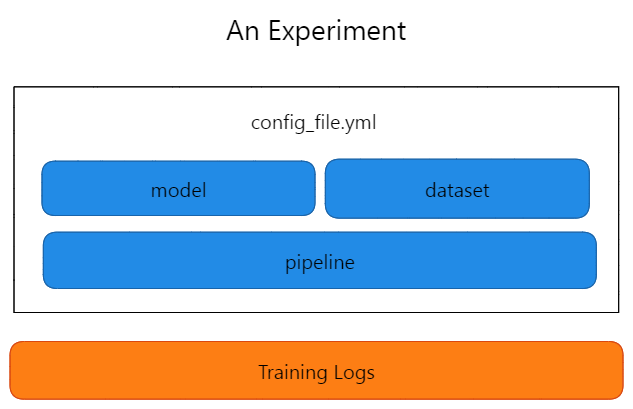

### 📚📑 Dataset: Experience in It's Rawest Form. 

In all supervised machine learning algorithms, models learn by "seeing" hundereds, thousands or even millions of examples. A dataset is fundamentally a collection of these examples. In our case, a dataset is a collections of annotated point clouds.

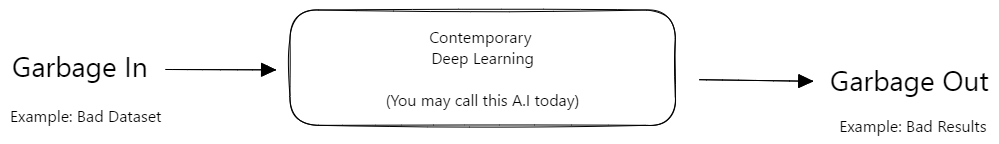


### 🧠🤖 Model: The Actual Learner.

Models *operate* on high dimensional data and (usually) reduce them to valuable insights; These operations heavily rely on optimized parameters called weights. Model output schema dependS on multiple factors.

In our case, model operates on high dimensional point cloud data and reduce it into lower dimensional insights such as - what kind of point cloud it is (entire point cloud classification) or what is type of each point in the point cloud (segmenation i.e point-wise classification) or what are the extents of a specific object (regression & classification). For different usecases we different model architectures. For example, RandLA-Net is an architecture used for point cloud segmentation tasks.

### 👨‍🔧🚿 Pipelines: The Learning Process

Pipelines in Open3D-ML define how a model and a dataset interact with each other. It also includes steps for training and inference.

The below image shows semantic segmenation using RandLA-Net 

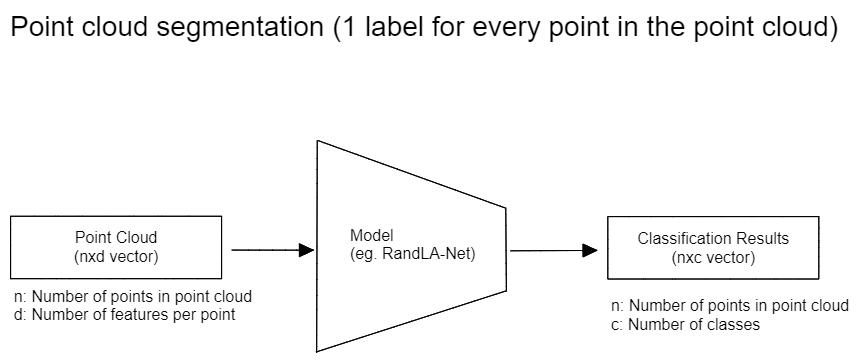

#### An Example

`randlanet_semantickitti.yml` is a config file used for semantic segmentation pipeline, using RandLA-Net model architecture and Semantic KITTI dataset. Let us have a look at it's contents like raw text file.

In [ ]:
%pycat "../../../ml3d/configs/randlanet_semantickitti.yml"

#### Read and Load Into Memory

To be able to utilize key-value pairs and parameters present in the config file, we must load the file into memory as `Config` class object. `Config` class object's usage is very much similar to standard Python dictionary `dict`.

`utils.Config.load_from_file` takes path to config file as input and returns `Config` class object as shown below:

In [ ]:
from open3d.ml import utils

cfg = utils.Config.load_from_file(cfg_file)

#### Probe, Examine & Access Parameters

Built-in function `vars` grabs all the properties of the object as dictionary

In [ ]:
vars(cfg)

List all the keys in the top most level:

In [ ]:
cfg.keys()

To access any property, use either `cfg.{property_name}` or `cfg['{property_name}']` syntax.

Access `dataset` parameters using: (same can be done for `model` and `pipeline`)

In [ ]:
cfg.dataset

One other way to access `dataset` parameters is accessing like a built-in `dict`.

In [ ]:
cfg['dataset']

Accessing individual parameters can be done with either `cfg.{property_name}.{property_name}` or `cfg['{property_name}']['{property_name}']` syntax. Inner levels can be accessed using the same idea.

Let's try to access `dataset -> sampler`:

In [ ]:
cfg.dataset.sampler

Another approach:

In [ ]:
cfg['dataset']['sampler']

#### Mutate Parameters

Please note that this will only alter the properties of `cfg` variable in memory. The original `yml` file on disk remains unchanged.

In [ ]:
cfg['dataset']['sampler'] = "NewSampler"

As shown above, we may use `cfg.dataset.sampler = "NewSampler"` as well!

#### Build Dataset Using Config

VERIFY: Use `**kwargs`

Explicitly create a `dataset` object which will hold all information from the `cfg.dataset` dictionary:

In [ ]:
dataset = ml3d.datasets.SemanticKITTI(cfg.dataset)

Look at what properties the newly-created `dataset` object exposes with the Python `vars()` function:

In [ ]:
vars(dataset)

We may reference any property of the `dataset` using above syntax. For example, to find out what value the `num_classes` property holds, we use:

In [ ]:
dataset.label_to_names

Similarly, we may bulild model and pipline components using `cfg.model` and `cfg.pipeline` respectively. Have a look at training tutorials for code examples.